# Predicting the Stock Market

This Jupyter notebook contains a simple example of how to use machine learning to predict stock price direction. The notebook starts by downloading historical data for the S&P 500 index using the yfinance library and then plots the data. The data is cleaned and prepared for use in a machine learning model.

Next, a random forest classifier from the scikit-learn library is trained on the data. The model is evaluated using a hold-out set and its accuracy is calculated.

The notebook then defines a backtest() function that splits the data into training and test sets, trains the model on the training data, and makes predictions on the test data. This function is used to make predictions for different time horizons, and the resulting predictions are evaluated using accuracy score.

Finally, the notebook adds additional predictors to the model and retrains it, finding that the new model performs better than the previous model.

In [58]:
import yfinance as yf

In [59]:
sp500 = yf.Ticker("^GSPC")

In [60]:
sp500 = sp500.history(period="max") 

In [61]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0
...,...,...,...,...,...,...,...
2022-11-25 00:00:00-05:00,4023.340088,4034.020020,4020.760010,4026.120117,1706460000,0,0
2022-11-28 00:00:00-05:00,4005.360107,4012.270020,3955.770020,3963.939941,3615430000,0,0
2022-11-29 00:00:00-05:00,3964.189941,3976.770020,3937.649902,3957.629883,3546040000,0,0


Only there are trading days.

In [62]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2022-11-17 00:00:00-05:00', '2022-11-18 00:00:00-05:00',
               '2022-11-21 00:00:00-05:00', '2022-11-22 00:00:00-05:00',
               '2022-11-23 00:00:00-05:00', '2022-11-25 00:00:00-05:00',
               '2022-11-28 00:00:00-05:00', '2022-11-29 00:00:00-05:00',
               '2022-11-30 00:00:00-05:00', '2022-12-01 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=23845, freq=None)

## CLEANING

<AxesSubplot:xlabel='Date'>

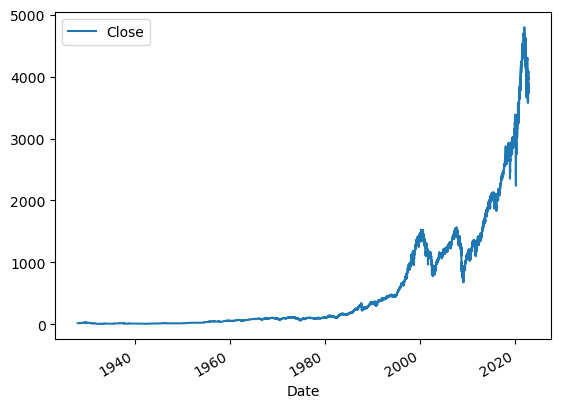

In [63]:
sp500.plot.line(y="Close", use_index=True)

In [64]:
sp500.drop(["Dividends", "Stock Splits"], axis=1)

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2022-11-25 00:00:00-05:00,4023.340088,4034.020020,4020.760010,4026.120117,1706460000
2022-11-28 00:00:00-05:00,4005.360107,4012.270020,3955.770020,3963.939941,3615430000
2022-11-29 00:00:00-05:00,3964.189941,3976.770020,3937.649902,3957.629883,3546040000


We are gonna to predict the direction of the price.

In [65]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [66]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow
Date,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0,17.500000
...,...,...,...,...,...,...,...,...
2022-11-25 00:00:00-05:00,4023.340088,4034.020020,4020.760010,4026.120117,1706460000,0,0,3963.939941
2022-11-28 00:00:00-05:00,4005.360107,4012.270020,3955.770020,3963.939941,3615430000,0,0,3957.629883
2022-11-29 00:00:00-05:00,3964.189941,3976.770020,3937.649902,3957.629883,3546040000,0,0,4080.110107


In [67]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [68]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0,0,17.500000,0
...,...,...,...,...,...,...,...,...,...
2022-11-25 00:00:00-05:00,4023.340088,4034.020020,4020.760010,4026.120117,1706460000,0,0,3963.939941,0
2022-11-28 00:00:00-05:00,4005.360107,4012.270020,3955.770020,3963.939941,3615430000,0,0,3957.629883,0
2022-11-29 00:00:00-05:00,3964.189941,3976.770020,3937.649902,3957.629883,3546040000,0,0,4080.110107,1


We are gonna to remove all data before 1990

In [69]:
sp500 = sp500.loc["1990-01-01":].copy()

In [70]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target
Date,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0,0,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0,0,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0,0,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0,0,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0,0,349.619995,0
...,...,...,...,...,...,...,...,...,...
2022-11-25 00:00:00-05:00,4023.340088,4034.020020,4020.760010,4026.120117,1706460000,0,0,3963.939941,0
2022-11-28 00:00:00-05:00,4005.360107,4012.270020,3955.770020,3963.939941,3615430000,0,0,3957.629883,0
2022-11-29 00:00:00-05:00,3964.189941,3976.770020,3937.649902,3957.629883,3546040000,0,0,4080.110107,1


## TRAINING

RandomForest

In [71]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])
        

RandomForestClassifier(min_samples_split=100, random_state=1)

In [72]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [73]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

In [74]:
preds

Date
2022-07-13 00:00:00-04:00    1
2022-07-14 00:00:00-04:00    1
2022-07-15 00:00:00-04:00    1
2022-07-18 00:00:00-04:00    0
2022-07-19 00:00:00-04:00    0
                            ..
2022-11-25 00:00:00-05:00    1
2022-11-28 00:00:00-05:00    0
2022-11-29 00:00:00-05:00    0
2022-11-30 00:00:00-05:00    0
2022-12-01 00:00:00-05:00    0
Length: 100, dtype: int64

In [75]:
precision_score(test["Target"], preds)

0.4426229508196721

In [76]:
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

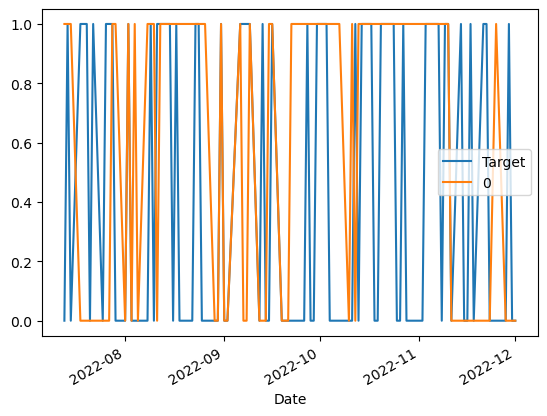

In [77]:
combined.plot()

backtesting


In [78]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined 

In [79]:
def backtest(data, model, predictors, start=2500, step=250):
    # 250 days with data for year aprox
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)    
    
        

In [80]:
predictions = backtest(sp500, model, predictors)

In [81]:
predictions["Predictions"].value_counts()

0    3376
1    2419
Name: Predictions, dtype: int64

In [82]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5299710624224886

In [83]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534599
0    0.465401
Name: Target, dtype: float64

Buy in the morning and sell it al end of the day is a better strategy that the algorithm


Adding additional predictors

In [84]:
horizons = [2, 5, 60, 250, 1000]
    # 2 days, last week, three months and so on
    
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] /  rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]
    

In [85]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,0,0,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,0,0,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,0,0,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,0,0,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,0,0,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25 00:00:00-05:00,4023.340088,4034.020020,4020.760010,4026.120117,1706460000,0,0,3963.939941,0,0.999858,1.0,1.007929,3.0,1.053161,26.0,0.965981,111.0,1.118263,544.0
2022-11-28 00:00:00-05:00,4005.360107,4012.270020,3955.770020,3963.939941,3615430000,0,0,3957.629883,0,0.992218,0.0,0.992432,2.0,1.036908,25.0,0.951613,111.0,1.100585,544.0
2022-11-29 00:00:00-05:00,3964.189941,3976.770020,3937.649902,3957.629883,3546040000,0,0,4080.110107,1,0.999203,0.0,0.990471,2.0,1.035107,25.0,0.950605,111.0,1.098431,543.0


In [86]:
sp500 = sp500.dropna()

In [87]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,0,0,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,0,0,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,0,0,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,0,0,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,0,0,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-23 00:00:00-05:00,4000.300049,4033.780029,3998.659912,4027.260010,3279720000,0,0,4026.120117,0,1.002949,2.0,1.012247,3.0,1.053785,26.0,0.965671,112.0,1.118993,544.0
2022-11-25 00:00:00-05:00,4023.340088,4034.020020,4020.760010,4026.120117,1706460000,0,0,3963.939941,0,0.999858,1.0,1.007929,3.0,1.053161,26.0,0.965981,111.0,1.118263,544.0
2022-11-28 00:00:00-05:00,4005.360107,4012.270020,3955.770020,3963.939941,3615430000,0,0,3957.629883,0,0.992218,0.0,0.992432,2.0,1.036908,25.0,0.951613,111.0,1.100585,544.0


Improving the model with the new parameters.


In [88]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [89]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    # now return the probability
    preds = model.predict_proba(test[predictors])[:,1]
    # threshold to 60%
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined 



In [90]:
predictions = backtest(sp500, model, new_predictors)

In [91]:
predictions["Predictions"].value_counts()

0.0    3982
1.0     812
Name: Predictions, dtype: int64

In [92]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5689655172413793

In [93]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.545056
0    0.454944
Name: Target, dtype: float64